In [2]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt


## Inversionsmethod

In [80]:
def pdf(x):
    # Dichte Funktion f(x) = e^(1-x)
    return math.exp(1 - x)
def cdf(x):
    # Verteilungsfunktion F(x) = 1-e^(1-x)
    return 1- math.exp(1 - x)
def inversion(u):
    # Inversion von Verteilungs Funktion F(x) = 1-e^(1-x)
    return 1 - math.log(1 - u)

def generate_random_numbers(n):
    uniform_random_numbers = np.random.rand(n)

    return [inversion(u) for u in uniform_random_numbers]

n = 10000
random_numbers = generate_random_numbers(n)

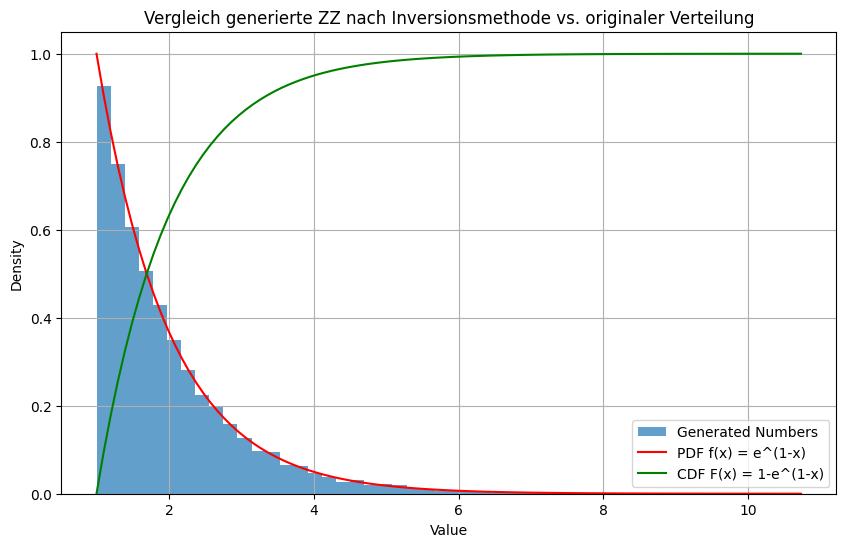

In [81]:
x_values = np.linspace(min(random_numbers), max(random_numbers), 100)
pdf_values = [pdf(x) for x in x_values]
cdf_values = [cdf(x) for x in x_values]
plt.figure(figsize=(10, 6))
plt.hist(random_numbers, bins=50, density=True, alpha=0.7, label='Generated Numbers')
plt.plot(x_values, pdf_values, label='PDF f(x) = e^(1-x)', color='red')
plt.plot(x_values, cdf_values, label='CDF F(x) = 1-e^(1-x)', color='green')

plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.title('Vergleich generierte ZZ nach Inversionsmethode vs. originaler Verteilung')
plt.legend()
plt.show()


## Annahme-Verwerfungs-Methode

In [6]:
def dichte_funktion(x: float) -> float:
    if x >= 3 and x <=7:
        return 1/(x * (math.log(7) - math.log(3)))
    else:
        ValueError("Only values between 3 and 7 are allowed")

In [7]:
def zz_generator(N):
    k = 1
    x_values = []
    y_values = []
    while k <= N:
        Q = random.uniform(3, 7)
        Y = random.uniform(0, dichte_funktion(3))
        
        if Y <= dichte_funktion(x=Q):
            x_values.append(Q)
            y_values.append(Y)
            k = k + 1
        
    return x_values, y_values

In [8]:
x, y = zz_generator(1000)

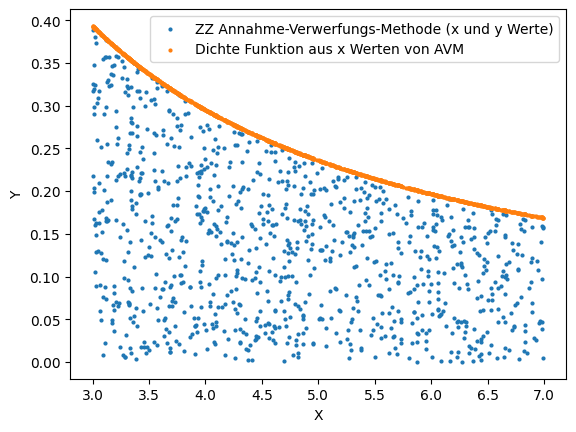

In [66]:
plt.scatter(x, y, s=4, label="ZZ Annahme-Verwerfungs-Methode (x und y Werte)")
plt.scatter(x, [dichte_funktion(x) for x in x], s=4, label="Dichte Funktion aus x Werten von AVM")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

## Box Muller Methode

In [28]:
def box_muller(n):
    # Generate 2n uniform random numbers between 0 and 1
    u1 = np.random.rand(n)
    u2 = np.random.rand(n)

    # Box-Muller transformation
    z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)

    return z0, z1

# Generate 10 pairs of normally distributed random numbers
n = 10000
z0, z1 = box_muller(n)

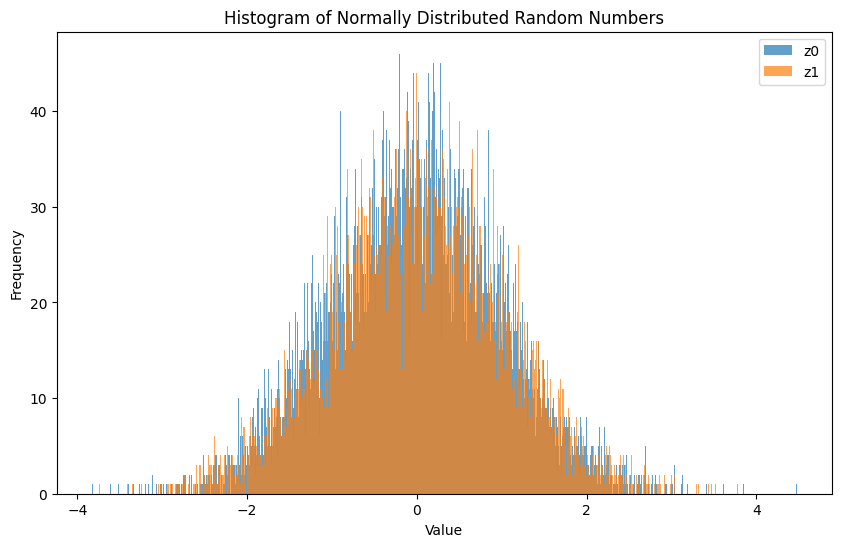

In [30]:
plt.figure(figsize=(10, 6))

plt.hist(z0, bins=1000, alpha=0.7, label='z0')
plt.hist(z1, bins=1000, alpha=0.7, label='z1')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Normally Distributed Random Numbers')
plt.legend()

# Show the plot
plt.show()
